In [46]:
import re  # python regular expression
import pandas as pd  # scientific dataframe
import matplotlib.pyplot as plt
from utils.IO import read_node_dmp, read_names

In [47]:
nodes = read_nodes_dmp(fname='./taxdump/nodes.dmp')
names = read_names_dmp(fname='./taxdump/names.dmp')

### nodes.dmp file

_ | title | description
:------|:------|:------------
1 | tax_id | node id in GenBank taxonomy database
2 | parent tax_id | parent node id in GenBank taxonomy database
3 | rank | rank of this node (superkingdom, kingdom, ...) 
4 | embl code | locus-name prefix; not unique
5 | division id | see division.dmp file
6 | inherited div flag  (1 or 0) | 1 if node inherits division from parent
7 | genetic code id | see gencode.dmp file
8 | inherited GC  flag  (1 or 0) | 1 if node inherits genetic code from parent
9 | mitochondrial genetic code id | see gencode.dmp file
10 | inherited MGC flag  (1 or 0) | 1 if node inherits mitochondrial gencode from parent
11 | GenBank hidden flag (1 or 0) | 1 if name is suppressed in GenBank entry lineage
12 | hidden subtree root flag (1 or 0) | 1 if this subtree has no sequence data yet
13| comments | free-text comments and citations

In [38]:
print(nodes.shape)
nodes.head()

(2248558, 13)


,tax_id,parent_tax_id,rank,embl_code,division_id,inherited_div_flag,genetic_code_id,inherited_GC_flag,mitochondrial_genetic_code_id,inherited_MGC_flag,GenBank_hidden_flag,hidden_subtree_root_flag,comments
0,1,1,no rank,,8,0,1,0,0,0,0,0,
1,2,131567,superkingdom,,0,0,11,0,0,0,0,0,
2,6,335928,genus,,0,1,11,1,0,1,0,0,
3,7,6,species,AC,0,1,11,1,0,1,1,0,
4,9,32199,species,BA,0,1,11,1,0,1,1,0,


In [39]:
nodes.tax_id.nunique()  # Matches the number of rows --> each row is a unique node in the database

2248558

In [40]:
nodes.parent_tax_id.nunique()  # Determines how these nodes are connected. Base node (tax_id) has no parent

194258

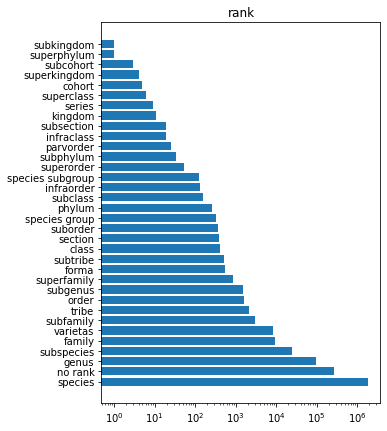

In [41]:
data = nodes['rank'].value_counts()
plt.figure(figsize=(5, 7))
plt.barh(y=data.index, width= data.values)
plt.xscale('log')
plt.title("rank")
plt.show()

notes: There seems to be quite alot of 'no rank' labels

### names.dmp file

In [42]:
print(names.shape)
names.head()

(3206837, 4)


,tax_id,name_txt,unique_name,name_class
0,1,all,,synonym
1,1,root,,scientific name
2,2,Bacteria,Bacteria <bacteria>,scientific name
3,2,Monera,Monera <bacteria>,in-part
4,2,Procaryotae,Procaryotae <bacteria>,in-part


https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3245000/
- "scientific name" is the primary name for a node (default to using this)
- Names are associated with nodes, and each taxid is linked to its parent taxid. The root node (taxid 1) links to itself.

In [45]:
names = names.loc[names['name_class'] == 'scientific name']